In [ ]:
#hide
#all_slow

In [ ]:
#hide
#default_exp network
import warnings
warnings.filterwarnings("ignore")
from nbdev.showdoc import show_doc
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# network

>Analyzing groups of glycans as networks (e.g., biosynthesis networks)

In [ ]:
#export
from glycowork.network.biosynthesis import *
from glycowork.network.evolution import *

`network` contains functions to arrange and analyze glycans in the context of networks. In such a network, each node represents a glycan and edges represent, for instance, their connection via a biosynthetic step. It should be noted, since `glycowork` treats glycans as molecular graphs, that these networks represent hierarchical graphs, with the network being one graph and each node within the network also a graph. `network` contains the following modules:
- `biosynthesis` contains functions to construct and analyze biosynthetic glycan networks
- `evolution` contains functions to compare (taxonomic) groups as to their glycan repertoires

## biosynthesis
>constructing and analyzing biosynthetic glycan networks

In [ ]:
show_doc(construct_network)

<h4 id="construct_network" class="doc_header"><code>construct_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L782" class="source_link" style="float:right">[source]</a></h4>

> <code>construct_network</code>(**`glycans`**, **`add_virtual_nodes`**=*`'exhaustive'`*, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`limit`**=*`5`*, **`ptm`**=*`True`*, **`allowed_ptms`**=*`['OS', '3S', '6S', '1P', '6P', 'OAc', '4Ac']`*, **`permitted_roots`**=*`['Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc-ol']`*, **`directed`**=*`True`*, **`edge_type`**=*`'monolink'`*)

visualize biosynthetic network

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed format
| add_virtual_nodes (string): indicates whether no ('none'), proximal ('simple'), or all ('exhaustive') virtual nodes should be added; default:'exhaustive'
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends
| limit (int): maximum number of virtual nodes between observed nodes; default:5
| ptm (bool): whether to consider post-translational modifications in the network construction; default:True
| allowed_ptms (list): list of PTMs to consider
| permitted_roots (list): which nodes should be considered as roots; default:["Gal(b1-4)Glc-ol", "Gal(b1-4)GlcNAc-ol"]
| directed (bool): whether to return a network with directed edges in the direction of biosynthesis; default:True
| edge_type (string): indicates whether edges represent monosaccharides ('monosaccharide'), monosaccharide(linkage) ('monolink'), or enzyme catalyzing the reaction ('enzyme'); default:'monolink'

| Returns:
| :-
| Returns a networkx object of the network

In [ ]:
show_doc(plot_network)

<h4 id="plot_network" class="doc_header"><code>plot_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L920" class="source_link" style="float:right">[source]</a></h4>

> <code>plot_network</code>(**`network`**, **`plot_format`**=*`'pydot2'`*, **`edge_label_draw`**=*`True`*, **`lfc_dict`**=*`None`*)

visualizes biosynthetic network

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| plot_format (string): how to layout network, either 'pydot2', 'kamada_kawai', or 'spring'; default:'pydot2'
| edge_label_draw (bool): draws edge labels if True; default:True
| lfc_dict (dict): dictionary of enzyme:log2-fold-change to scale edge width; default:None

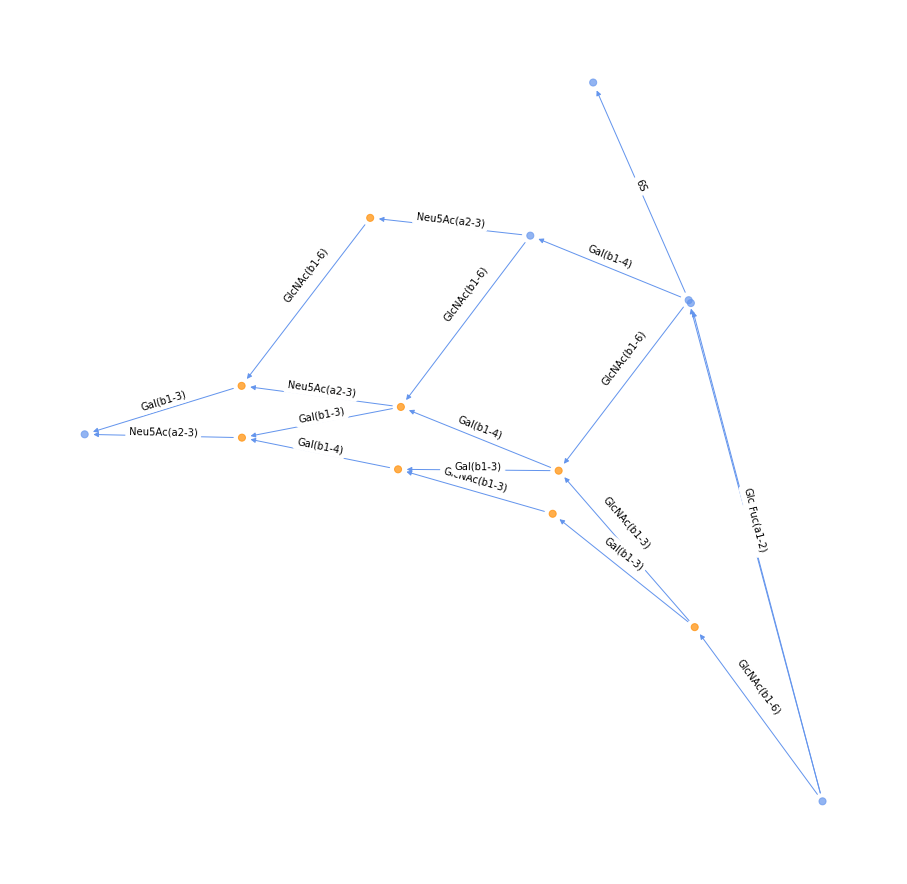

In [ ]:
glycans = ["Gal(b1-4)Glc-ol", "GlcNAc(b1-3)Gal(b1-4)Glc-ol",
           "GlcNAc6S(b1-3)Gal(b1-4)Glc-ol",
           "Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol", "Fuc(a1-2)Gal(b1-4)Glc-ol",
          "Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-6)]Gal(b1-4)Glc-ol"]
network = construct_network(glycans)
plot_network(network, plot_format = 'kamada_kawai')

In [ ]:
show_doc(find_diff)

<h4 id="find_diff" class="doc_header"><code>find_diff</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L177" class="source_link" style="float:right">[source]</a></h4>

> <code>find_diff</code>(**`glycan_a`**, **`glycan_b`**, **`libr`**=*`None`*)

finds the subgraph that differs between glycans and returns it, will only work if the differing subgraph is connected

| Arguments:
| :-
| glycan_a (string): glycan in IUPAC-condensed format
| glycan_b (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns difference between glycan_a and glycan_b in IUPAC-condensed

In [ ]:
find_diff('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
         'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

'Fuc(a1-6)'

In [ ]:
show_doc(get_virtual_nodes)

<h4 id="get_virtual_nodes" class="doc_header"><code>get_virtual_nodes</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L136" class="source_link" style="float:right">[source]</a></h4>

> <code>get_virtual_nodes</code>(**`glycan`**, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*)

find unobserved biosynthetic precursors of a glycan

| Arguments:
| :-
| glycan (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends

| Returns:
| :-
| (1) list of virtual node graphs
| (2) list of virtual nodes in IUPAC-condensed format

In [ ]:
get_virtual_nodes('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol')

([<networkx.classes.graph.Graph at 0x232308a1370>,
 ['Man(a1-6)Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol',
  'Man(a1-3)Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol'])

In [ ]:
show_doc(find_shared_virtuals)

<h4 id="find_shared_virtuals" class="doc_header"><code>find_shared_virtuals</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L222" class="source_link" style="float:right">[source]</a></h4>

> <code>find_shared_virtuals</code>(**`glycan_a`**, **`glycan_b`**, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`min_size`**=*`1`*)

finds virtual nodes that are shared between two glycans (i.e., that connect these two glycans)

| Arguments:
| :-
| glycan_a (string): glycan in IUPAC-condensed format
| glycan_b (string): glycan in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends
| min_size (int): length of smallest root in biosynthetic network; default:1

| Returns:
| :-
| Returns list of edges between glycan and virtual node (if virtual node connects the two glycans)

In [ ]:
find_shared_virtuals('GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
                    'GlcNAc(b1-2)Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol')

[('GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol'),
 ('GlcNAc(b1-2)Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol',
  'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc-ol')]

In [ ]:
show_doc(find_shortest_path)

<h4 id="find_shortest_path" class="doc_header"><code>find_shortest_path</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L458" class="source_link" style="float:right">[source]</a></h4>

> <code>find_shortest_path</code>(**`goal_glycan`**, **`glycan_list`**, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`limit`**=*`5`*, **`permitted_roots`**=*`['Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc-ol']`*)

finds the glycan with the shortest path via virtual nodes to the goal glycan

| Arguments:
| :-
| goal_glycan (string): glycan in IUPAC-condensed format
| glycan_list (list): list of glycans in IUPAC-condensed format
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| reducing_end (list): monosaccharides at the reducing end that are allowed; default:milk glycan reducing ends
| limit (int): maximum number of virtual nodes between observed nodes; default:5
| permitted_roots (list): which nodes should be considered as roots; default:["Gal(b1-4)Glc-ol", "Gal(b1-4)GlcNAc-ol"]

| Returns:
| :-
| (1) list of edges of shortest path to connect goal_glycan and glycan via virtual nodes
| (2) dictionary of edge labels detailing difference between two connected nodes in shortest path

In [ ]:
find_shortest_path('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol',
                  ['Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc-ol'])

([('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'GlcNAc(b1-3)Gal(b1-4)Glc-ol'),
  ('GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol')],
 {('Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc-ol',
   'GlcNAc(b1-3)Gal(b1-4)Glc-ol'): 'Gal(b1-4)',
  ('GlcNAc(b1-3)Gal(b1-4)Glc-ol', 'Gal(b1-4)Glc-ol'): 'GlcNAc(b1-3)'})

In [ ]:
show_doc(infer_network)

<h4 id="infer_network" class="doc_header"><code>infer_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L1038" class="source_link" style="float:right">[source]</a></h4>

> <code>infer_network</code>(**`network`**, **`network_species`**, **`species_list`**, **`network_dic`**, **`df`**=*`None`*, **`add_virtual_nodes`**=*`'exhaustive'`*, **`libr`**=*`None`*, **`reducing_end`**=*`['Glc-ol', 'GlcNAc-ol', 'Glc3S-ol', 'GlcNAc6S-ol', 'GlcNAc6P-ol', 'GlcNAc1P-ol', 'Glc3P-ol', 'Glc6S-ol', 'GlcOS-ol']`*, **`limit`**=*`5`*, **`ptm`**=*`True`*, **`allowed_ptms`**=*`['OS', '3S', '6S', '1P', '6P', 'OAc', '4Ac']`*, **`permitted_roots`**=*`['Gal(b1-4)Glc-ol', 'Gal(b1-4)GlcNAc-ol']`*, **`directed`**=*`True`*)

replaces virtual nodes if they are observed in other species

| Arguments:
| :-
| network (networkx object): biosynthetic network that should be inferred
| network_species (string): species from which the network stems
| species_list (list): list of species to compare network to
| network_dic (dict): dictionary of form species name : biosynthetic network (gained from construct_network)
| df (dataframe): dataframe containing species-specific glycans, only needed if filepath=None;default:None
| add_virtual_nodes (string): indicates whether no ('None'), proximal ('simple'), or all ('exhaustive') virtual nodes should be added;only needed if filepath=None;default:'exhaustive'
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used;only needed if filepath=None
| reducing_end (list): monosaccharides at the reducing end that are allowed;only needed if filepath=None;default:milk glycan reducing ends
| limit (int): maximum number of virtual nodes between observed nodes;only needed if filepath=None;default:5
| ptm (bool): whether to consider post-translational modifications in the network construction; default:True
| allowed_ptms (list): list of PTMs to consider
| permitted_roots (list): which nodes should be considered as roots; default:["Gal(b1-4)Glc-ol", "Gal(b1-4)GlcNAc-ol"]
| directed (bool): whether to return a network with directed edges in the direction of biosynthesis; default:True

| Returns:
| :-
| Returns network with filled in virtual nodes

In [ ]:
show_doc(retrieve_inferred_nodes)

<h4 id="retrieve_inferred_nodes" class="doc_header"><code>retrieve_inferred_nodes</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L1089" class="source_link" style="float:right">[source]</a></h4>

> <code>retrieve_inferred_nodes</code>(**`network`**, **`species`**=*`None`*)

returns the inferred virtual nodes of a network that has been used with infer_network

| Arguments:
| :-
| network (networkx object): biosynthetic network with inferred virtual nodes
| species (string): species from which the network stems (only relevant if multiple species in network); default:None

| Returns:
| :-
| Returns inferred nodes as list or dictionary (if species argument is used)

In [ ]:
show_doc(update_network)

<h4 id="update_network" class="doc_header"><code>update_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L630" class="source_link" style="float:right">[source]</a></h4>

> <code>update_network</code>(**`network_in`**, **`edge_list`**, **`edge_labels`**=*`None`*, **`node_labels`**=*`None`*)

updates a network with new edges and their labels

| Arguments:
| :-
| network (networkx object): network that should be modified
| edge_list (list): list of edges as node tuples
| edge_labels (list): list of edge labels as strings
| node_labels (dict): dictionary of form node:0 or 1 depending on whether the node is observed or virtual

| Returns:
| :-
| Returns network with added edges

In [ ]:
show_doc(trace_diamonds)

<h4 id="trace_diamonds" class="doc_header"><code>trace_diamonds</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L1233" class="source_link" style="float:right">[source]</a></h4>

> <code>trace_diamonds</code>(**`network`**, **`species_list`**, **`network_dic`**, **`libr`**=*`None`*)

extracts diamond-shape motifs from biosynthetic networks (A->B,A->C,B->D,C->D) and uses evolutionary information to determine which path is taken from A to D

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| species_list (list): list of species to compare network to
| network_dic (dict): dictionary of form species name : biosynthetic network (gained from construct_network)
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns dataframe of each intermediary glycan and its proportion (0-1) of how often it has been experimentally observed in this path

In [ ]:
show_doc(evoprune_network)

<h4 id="evoprune_network" class="doc_header"><code>evoprune_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L1279" class="source_link" style="float:right">[source]</a></h4>

> <code>evoprune_network</code>(**`network`**, **`network_dic`**=*`None`*, **`species_list`**=*`None`*, **`libr`**=*`None`*, **`node_attr`**=*`'abundance'`*, **`threshold`**=*`0.0`*)

given a biosynthetic network, this function uses evolutionary relationships to prune impossible paths

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| network_dic (dict): dictionary of form species name : biosynthetic network (gained from construct_network); default:pre-computed milk networks
| species_list (list): list of species to compare network to; default:species from pre-computed milk networks
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| node_attr (string): which (numerical) node attribute to use for pruning; default:'abundance'
| threshold (float): everything below or equal to that threshold will be cut; default:0.

| Returns:
| :-
| Returns pruned network (with virtual node probability as a new node attribute)

In [ ]:
show_doc(highlight_network)

<h4 id="highlight_network" class="doc_header"><code>highlight_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L1309" class="source_link" style="float:right">[source]</a></h4>

> <code>highlight_network</code>(**`network`**, **`highlight`**, **`motif`**=*`None`*, **`abundance_df`**=*`None`*, **`glycan_col`**=*`'target'`*, **`intensity_col`**=*`'rel_intensity'`*, **`conservation_df`**=*`None`*, **`network_dic`**=*`None`*, **`species`**=*`None`*, **`libr`**=*`None`*)

highlights a certain attribute in the network that will be visible when using plot_network

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| highlight (string): which attribute to highlight (choices are 'motif' for glycan motifs, 'abundance' for glycan abundances, 'conservation' for glycan conservation, 'species' for highlighting 1 species in multi-network)
| motif (string): highlight=motif; which motif to highlight (absence/presence, in violet/green); default:None
| abundance_df (dataframe): highlight=abundance; dataframe containing glycans and their relative intensity
| glycan_col (string): highlight=abundance; column name of the glycans in abundance_df
| intensity_col (string): highlight=abundance; column name of the relative intensities in abundance_df
| conservation_df (dataframe): highlight=conservation; dataframe containing glycans from different species
| network_dic (dict): highlight=conservation/species; dictionary of form species name : biosynthetic network (gained from construct_network); default:pre-computed milk networks
| species (string): highlight=species; which species to highlight in a multi-species network
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

| Returns:
| :-
| Returns a network with the additional 'origin' (motif/species) or 'abundance' (abundance/conservation) node attribute storing the highlight

In [ ]:
show_doc(export_network)

<h4 id="export_network" class="doc_header"><code>export_network</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/biosynthesis.py#L1106" class="source_link" style="float:right">[source]</a></h4>

> <code>export_network</code>(**`network`**, **`filepath`**)

converts NetworkX network into files usable, e.g., by Cytoscape or Gephi

| Arguments:
| :-
| network (networkx object): biosynthetic network, returned from construct_network
| filepath (string): should describe a valid path + file name prefix, will be appended by file description and type

| Returns:
| :-
| (1) saves a .csv dataframe containing the edge list and edge labels
| (2) saves a .csv dataframe containing node IDs and labels

## evolution
>investigating evolutionary relationships of glycans

In [ ]:
show_doc(distance_from_embeddings)

<h4 id="distance_from_embeddings" class="doc_header"><code>distance_from_embeddings</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/evolution.py#L46" class="source_link" style="float:right">[source]</a></h4>

> <code>distance_from_embeddings</code>(**`df`**, **`embeddings`**, **`cut_off`**=*`10`*, **`rank`**=*`'Species'`*, **`averaging`**=*`'median'`*)

calculates a cosine distance matrix from learned embeddings

| Arguments:
| :-
| df (dataframe): dataframe with glycans as rows and taxonomic information as columns
| embeddings (dataframe): dataframe with glycans as rows and learned embeddings as columns (e.g., from glycans_to_emb)
| cut_off (int): how many glycans a rank (e.g., species) needs to have at least to be included; default:10
| rank (string): which taxonomic rank to use for grouping organisms; default:'Species'
| averaging (string): how to average embeddings, by 'median' or 'mean'; default:'median'

| Returns:
| :-
| Returns a rank x rank distance matrix

In [ ]:
show_doc(distance_from_metric)

<h4 id="distance_from_metric" class="doc_header"><code>distance_from_metric</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/evolution.py#L90" class="source_link" style="float:right">[source]</a></h4>

> <code>distance_from_metric</code>(**`df`**, **`networks`**, **`metric`**=*`'Jaccard'`*, **`cut_off`**=*`10`*, **`rank`**=*`'Species'`*)

calculates a distance matrix of generated networks based on provided metric

| Arguments:
| :-
| df (dataframe): dataframe with glycans as rows and taxonomic information as columns
| networks (list): list of networks in networkx format
| metric (string): which metric to use, available: 'Jaccard'; default:'Jaccard'
| cut_off (int): how many glycans a rank (e.g., species) needs to have at least to be included; default:10
| rank (string): which taxonomic rank to use for grouping organisms; default:'Species'

| Returns:
| :-
| Returns a rank x rank distance matrix

In [ ]:
show_doc(dendrogram_from_distance)

<h4 id="dendrogram_from_distance" class="doc_header"><code>dendrogram_from_distance</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/evolution.py#L117" class="source_link" style="float:right">[source]</a></h4>

> <code>dendrogram_from_distance</code>(**`dm`**, **`ylabel`**=*`'Mammalia'`*, **`filepath`**=*`''`*)

plots a dendrogram from distance matrix

| Arguments:
| :-
| dm (dataframe): a rank x rank distance matrix (e.g., from distance_from_embeddings)
| ylabel (string): how to label the y-axis of the dendrogram; default:'Mammalia'
| filepath (string): absolute path including full filename allows for saving the plot

In [ ]:
show_doc(check_conservation)

<h4 id="check_conservation" class="doc_header"><code>check_conservation</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/evolution.py#L146" class="source_link" style="float:right">[source]</a></h4>

> <code>check_conservation</code>(**`glycan`**, **`df`**, **`network_dic`**=*`None`*, **`libr`**=*`None`*, **`rank`**=*`'Order'`*, **`threshold`**=*`5`*, **`motif`**=*`False`*)

estimates evolutionary conservation of glycans and glycan motifs via biosynthetic networks

| Arguments:
| :-
| glycan (string): full glycan or glycan motif in IUPAC-condensed nomenclature
| df (dataframe): dataframe in the style of df_species, each row one glycan and columns are the taxonomic levels
| network_dic (dict): dictionary of form species name : biosynthetic network (gained from construct_network); default:pre-computed milk networks
| libr (list): library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used
| rank (string): at which taxonomic level to assess conservation; default:Order
| threshold (int): threshold of how many glycans a species needs to have to consider the species;default:5
| motif (bool): whether glycan is a motif (True) or a full sequence (False); default:False

| Returns:
| :-
| Returns a dictionary of taxonomic group : degree of conservation

In [ ]:
show_doc(get_communities)

<h4 id="get_communities" class="doc_header"><code>get_communities</code><a href="https://github.com/BojarLab/glycowork/tree/master/glycowork/network/evolution.py#L191" class="source_link" style="float:right">[source]</a></h4>

> <code>get_communities</code>(**`graph_list`**, **`label_list`**=*`None`*)

Find communities for each graph in a list of graphs

| Arguments:
| :-
| graph_list (list): list of undirected biosynthetic networks, in the form of networkx objects
| label_list (list): labels to create the community names, which are running_number + _ + label[k]  for graph_list[k]; default:range(len(graph_list))

| Returns:
| :-
| Returns a merged dictionary of community : glycans in that community

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_glycan_data.ipynb.
Converted 02_ml.ipynb.
Converted 03_motif.ipynb.
Converted 04_network.ipynb.
Converted 05_examples.ipynb.
Converted index.ipynb.
